<a href="https://colab.research.google.com/github/Ahmedhany-1/Ai-Project/blob/main/Skin%20Cancer%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install -q kaggle
!pip install -q seaborn


In [11]:
from google.colab import files
files.upload()  # Upload kaggle.json here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahmedhanyfathy","key":"b7cbac5897ef22c112e82357f9d97688"}'}

In [12]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [16]:
!kaggle competitions download -c isic-2024-challenge
!unzip -q isic-2024-challenge.zip -d isic2024


isic-2024-challenge.zip: Skipping, found more recently modified local copy (use --force to force download)


In [17]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [19]:
data_dir = 'isic2024'
for root, dirs, files in os.walk(data_dir):
    print(f"In {root}: {len(files)} files, {len(dirs)} folders")


In isic2024: 5 files, 1 folders
In isic2024/train-image: 0 files, 1 folders
In isic2024/train-image/image: 401059 files, 0 folders


In [22]:
df = pd.read_csv("isic2024/train-metadata.csv")
df.head()

isic_id  target  patient_id  age_approx   sex anatom_site_general  \
0  ISIC_0015670       0  IP_1235828        60.0  male     lower extremity   
1  ISIC_0015845       0  IP_8170065        60.0  male           head/neck   
2  ISIC_0015864       0  IP_6724798        60.0  male     posterior torso   
3  ISIC_0015902       0  IP_4111386        65.0  male      anterior torso   
4  ISIC_0024200       0  IP_8313778        55.0  male      anterior torso   

   clin_size_long_diam_mm          image_type tbp_tile_type   tbp_lv_A  ...  \
0                    3.04  TBP tile: close-up     3D: white  20.244422  ...   
1                    1.10  TBP tile: close-up     3D: white  31.712570  ...   
2                    3.40  TBP tile: close-up        3D: XP  22.575830  ...   
3                    3.22  TBP tile: close-up        3D: XP  14.242329  ...   
4                    2.73  TBP tile: close-up     3D: white  24.725520  ...   

    lesion_id  iddx_full  iddx_1  iddx_2  iddx_3  iddx_4  iddx_5  \
0         NaN     Benign  Benign     NaN     NaN     NaN     NaN   
1  IL_6727506     Benign  Benign     NaN     NaN     NaN     NaN   
2         NaN     Benign  Benign     NaN     NaN     NaN     NaN   
3         NaN     Benign  Benign     NaN     NaN     NaN     NaN   
4         NaN     Benign  Benign     NaN     NaN     NaN     NaN   

   mel_mitotic_index  mel_thick_mm  tbp_lv_dnn_lesion_confidence  
0                NaN           NaN                     97.517282  
1                NaN           NaN                      3.141455  
2                NaN           NaN                     99.804040  
3                NaN           NaN                     99.989998  
4                NaN           NaN                     70.442510  

[5 rows x 55 columns]

In [24]:
df.isnull().sum()

isic_id                              0
target                               0
patient_id                           0
age_approx                        2798
sex                              11517
anatom_site_general               5756
clin_size_long_diam_mm               0
image_type                           0
tbp_tile_type                        0
tbp_lv_A                             0
tbp_lv_Aext                          0
tbp_lv_B                             0
tbp_lv_Bext                          0
tbp_lv_C                             0
tbp_lv_Cext                          0
tbp_lv_H                             0
tbp_lv_Hext                          0
tbp_lv_L                             0
tbp_lv_Lext                          0
tbp_lv_areaMM2                       0
tbp_lv_area_perim_ratio              0
tbp_lv_color_std_mean                0
tbp_lv_deltaA                        0
tbp_lv_deltaB                        0
tbp_lv_deltaL                        0
tbp_lv_deltaLB                       0
tbp_lv_deltaLBnorm                   0
tbp_lv_eccentricity                  0
tbp_lv_location                      0
tbp_lv_location_simple               0
tbp_lv_minorAxisMM                   0
tbp_lv_nevi_confidence               0
tbp_lv_norm_border                   0
tbp_lv_norm_color                    0
tbp_lv_perimeterMM                   0
tbp_lv_radial_color_std_max          0
tbp_lv_stdL                          0
tbp_lv_stdLExt                       0
tbp_lv_symm_2axis                    0
tbp_lv_symm_2axis_angle              0
tbp_lv_x                             0
tbp_lv_y                             0
tbp_lv_z                             0
attribution                          0
copyright_license                    0
lesion_id                       379001
iddx_full                            0
iddx_1                               0
iddx_2                          399991
iddx_3                          399994
iddx_4                          400508
iddx_5                          401058
mel_mitotic_index               401006
mel_thick_mm                    400996
tbp_lv_dnn_lesion_confidence         0
dtype: int64

In [27]:
for column in df.columns:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)

missing_values_after_filling = df.isnull().sum()
print(missing_values_after_filling)

isic_id                         0
target                          0
patient_id                      0
age_approx                      0
sex                             0
anatom_site_general             0
clin_size_long_diam_mm          0
image_type                      0
tbp_tile_type                   0
tbp_lv_A                        0
tbp_lv_Aext                     0
tbp_lv_B                        0
tbp_lv_Bext                     0
tbp_lv_C                        0
tbp_lv_Cext                     0
tbp_lv_H                        0
tbp_lv_Hext                     0
tbp_lv_L                        0
tbp_lv_Lext                     0
tbp_lv_areaMM2                  0
tbp_lv_area_perim_ratio         0
tbp_lv_color_std_mean           0
tbp_lv_deltaA                   0
tbp_lv_deltaB                   0
tbp_lv_deltaL                   0
tbp_lv_deltaLB                  0
tbp_lv_deltaLBnorm              0
tbp_lv_eccentricity             0
tbp_lv_location                 0
tbp_lv_locatio

In [29]:
X = df.drop(['isic_id', 'patient_id', 'tbp_lv_location', 'tbp_tile_type', 'tbp_lv_location_simple', 'image_type','attribution', 'copyright_license', 'lesion_id', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5',
       'mel_mitotic_index', 'mel_thick_mm', 'tbp_lv_dnn_lesion_confidence', 'target'], axis=1)
y = df['target']

In [30]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [31]:
ohe = ['sex', 'anatom_site_general']

In [32]:
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(), ohe)
    ])

## For randomforest classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [35]:
label = LabelEncoder()
y_train_label = label.fit_transform(y_train)
y_test_label = label.transform(y_val)

In [36]:
pipeline.fit(X_train, y_train_label)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe', OneHotEncoder(),
                                                  ['sex',
                                                   'anatom_site_general'])])),
                ('classifier', RandomForestClassifier())])

In [37]:
accuracy = pipeline.score(X_val, y_test_label)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.999077444771356


In [38]:
from sklearn.model_selection import cross_val_score, learning_curve, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score
import numpy as np

In [39]:
# Define categorical and numerical features
ohe = ['sex', 'anatom_site_general']
scale = ['age_approx', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B']

# ColumnTransformer for OneHotEncoding
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(), ohe)
    ])

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Label Encode target
label = LabelEncoder()
y_train_label = label.fit_transform(y_train)
y_val_label = label.transform(y_val)

In [40]:
models = {
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'SVM': SVC(probability=True)  # Enable probability for ROC curve
}

pipelines = {}
for model_name, model in models.items():
    pipelines[model_name] = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])


----- RandomForest -----
Model Accuracy: 0.999077444771356
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     80138
           1       0.00      0.00      0.00        74

    accuracy                           1.00     80212
   macro avg       0.50      0.50      0.50     80212
weighted avg       1.00      1.00      1.00     80212



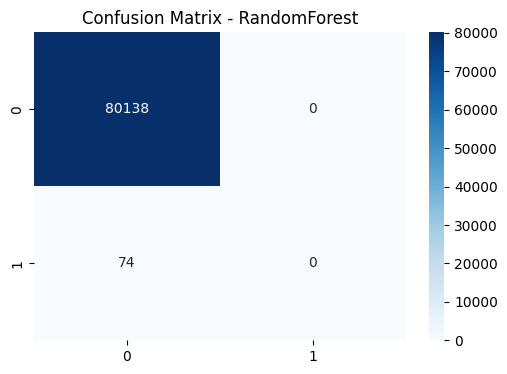

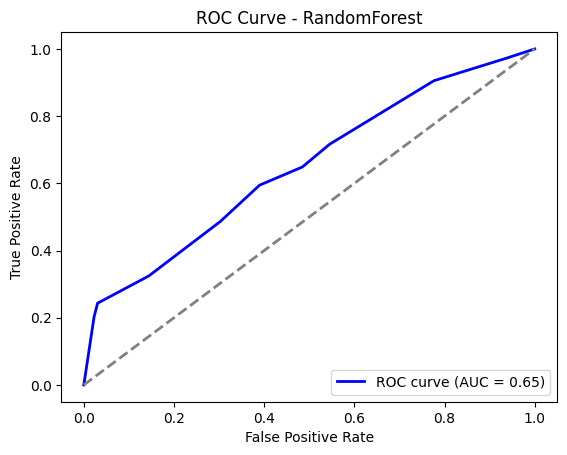

Cross-Validation Scores: [0.99900265 0.99900265 0.99901822 0.99900263 0.99900263]
Mean Cross-Validation Score: 0.9990057566572693


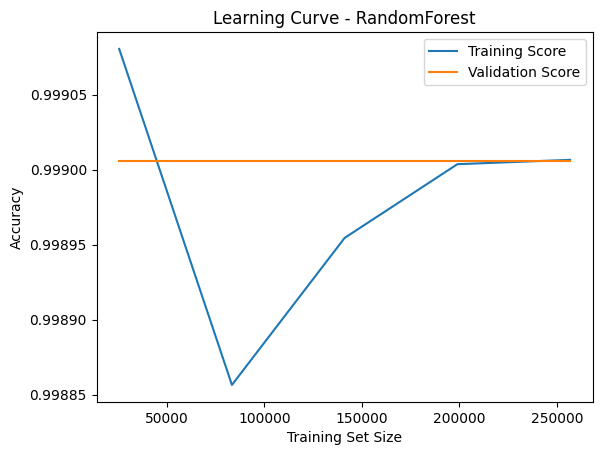


----- XGBoost -----
Model Accuracy: 0.999077444771356
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     80138
           1       0.00      0.00      0.00        74

    accuracy                           1.00     80212
   macro avg       0.50      0.50      0.50     80212
weighted avg       1.00      1.00      1.00     80212



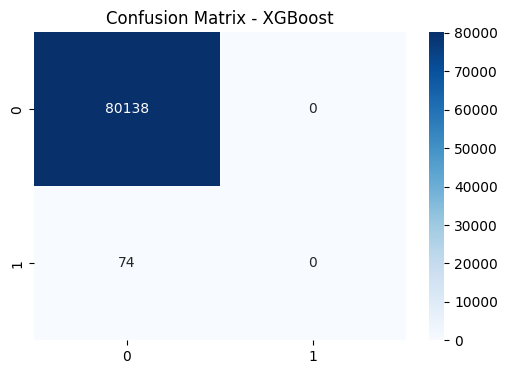

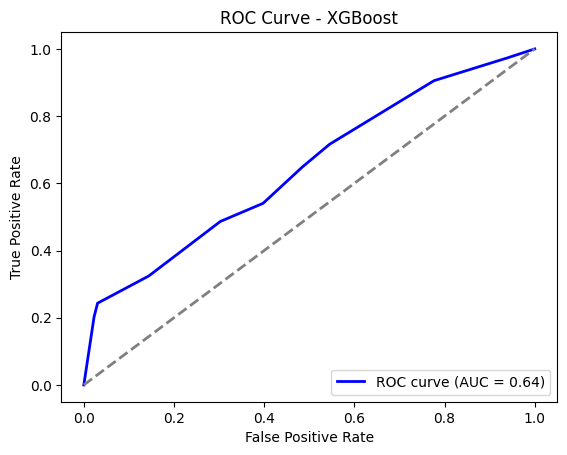

Cross-Validation Scores: [0.99900265 0.99900265 0.99901822 0.99900263 0.99900263]
Mean Cross-Validation Score: 0.9990057566572693


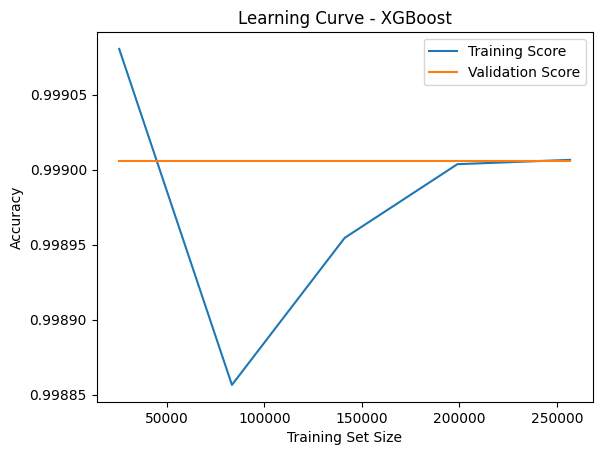


----- DecisionTree -----
Model Accuracy: 0.999077444771356
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     80138
           1       0.00      0.00      0.00        74

    accuracy                           1.00     80212
   macro avg       0.50      0.50      0.50     80212
weighted avg       1.00      1.00      1.00     80212



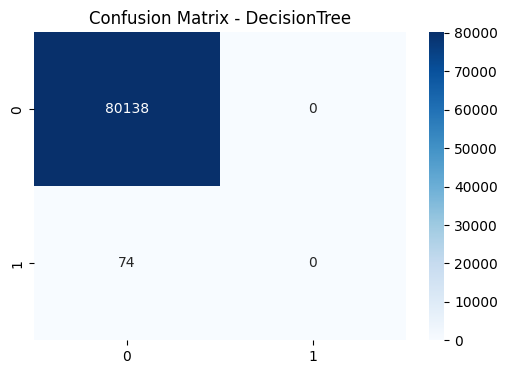

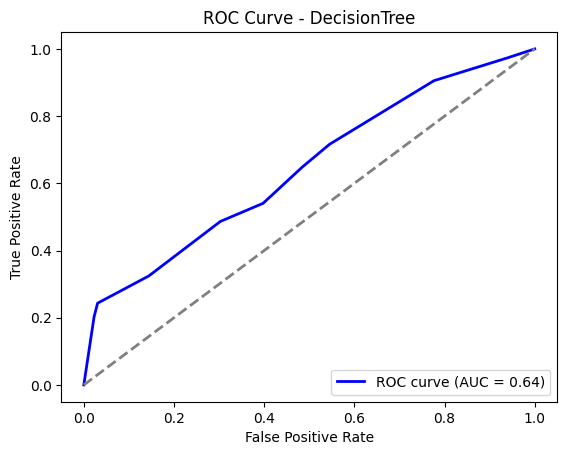

Cross-Validation Scores: [0.99900265 0.99900265 0.99901822 0.99900263 0.99900263]
Mean Cross-Validation Score: 0.9990057566572693


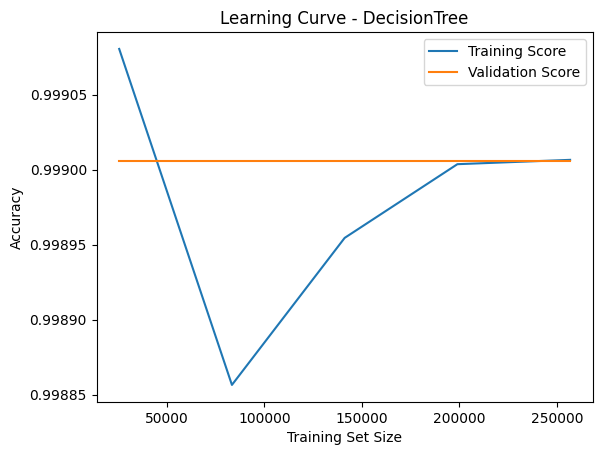


----- SVM -----
Model Accuracy: 0.999077444771356
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     80138
           1       0.00      0.00      0.00        74

    accuracy                           1.00     80212
   macro avg       0.50      0.50      0.50     80212
weighted avg       1.00      1.00      1.00     80212



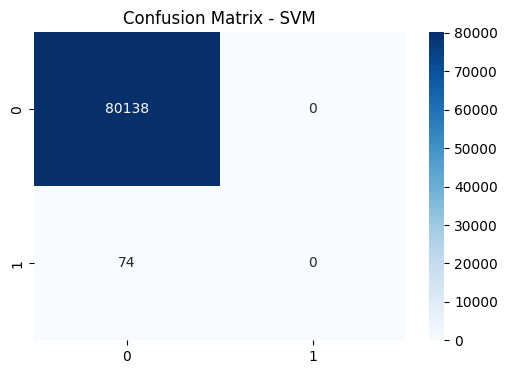

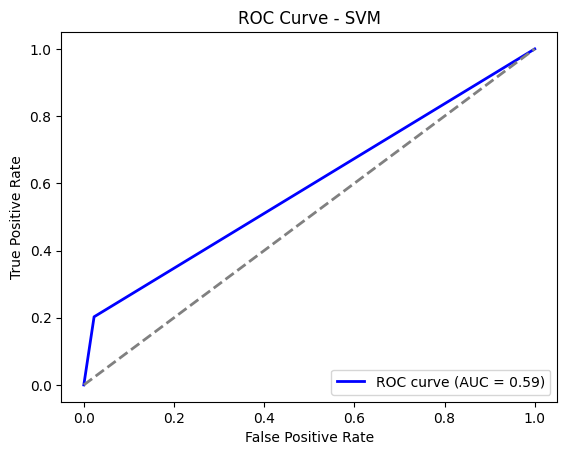

Cross-Validation Scores: [0.99900265 0.99900265 0.99901822 0.99900263 0.99900263]
Mean Cross-Validation Score: 0.9990057566572693


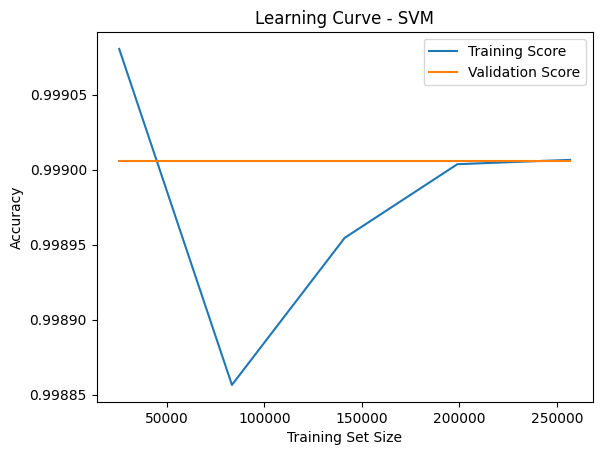

In [41]:
for model_name, pipeline in pipelines.items():
    print(f"\n----- {model_name} -----")

    # Train the model
    pipeline.fit(X_train, y_train_label)

    # Accuracy
    accuracy = pipeline.score(X_val, y_val_label)
    print(f'Model Accuracy: {accuracy}')

    # Classification Report
    y_pred = pipeline.predict(X_val)
    print("Classification Report:")
    print(classification_report(y_val_label, y_pred))

    # Confusion Matrix
    conf_mat = confusion_matrix(y_val_label, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues")
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    # ROC Curve
    y_proba = pipeline.predict_proba(X_val)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_val_label, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

    # Cross-Validation
    cross_val = cross_val_score(pipeline, X_train, y_train_label, cv=5)
    print(f'Cross-Validation Scores: {cross_val}')
    print(f'Mean Cross-Validation Score: {np.mean(cross_val)}')

    # Learning Curve
    train_sizes, train_scores, val_scores = learning_curve(pipeline, X_train, y_train_label, cv=5)
    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)

    plt.plot(train_sizes, train_mean, label='Training Score')
    plt.plot(train_sizes, val_mean, label='Validation Score')
    plt.title(f'Learning Curve - {model_name}')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()